# 方策改善

## 1. 方策評価
方策の良さをどうやって定量的に評価するか ? 

方策の順序関係を状態価値関数を用いて定義する.

$$ \pi_1 \text{より} \pi_2 \text{が良い} \underset{def}{\Leftrightarrow} V^{\pi_1}(s) \leq V^{\pi_2}(s) \ (\forall s \in S) $$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# 1. 再帰関数を用いた実装
S = [ i for i in range(9) ]
A = ["up" , "right", "down", "left"]

# 報酬関数
def reward(s, a, s_next):
    if s_next == 8:
        return 10.0
    # [変更!!] s5についたら罰報酬 -5.0
    if s_next == 5:
        return -5.0
    else:
        return 0.0
# 割引率
gamma = 0.95

# 行動番号を返す.
def action_idx(a):
    if a == "up":
        action = 0
    elif a == "right":
        action = 1
    elif a == "down":
        action = 2
    elif a == "left":
        action = 3
    return action
# 次の場所を返す.
def next_s(s, a):
    if a == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif a == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif a == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif a == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next
# 状態sで行動aを選択可能か(True / False)
def valid_action(s, a):
    if s == 0:
        return ( (a == "right") or (a == "down"))
    elif s == 1:
        return (a == "right" or a == "left")
    elif s == 2:
        return (a == "left" or a == "down")
    elif s == 3:
        return (a != "left")
    elif s == 4:
        return (a == "left" or a == "down")
    elif s == 5:
        return (a == "up")
    elif s == 6:
        return (a == "up")
    elif s == 7:
        return (a == "up" or a == "right")
    elif s == 8:
        return False


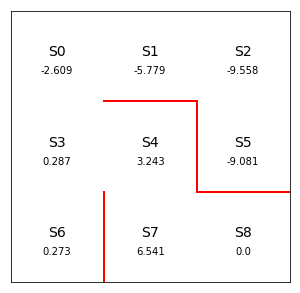

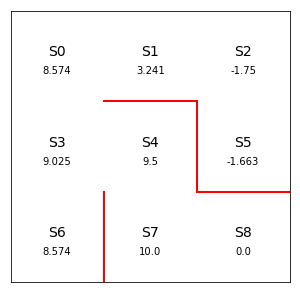

In [52]:
# 必ず4手でゴールにたどり着ける方策 pi_star を使って状態価値を求める.
# 連立1次方程式を直接法で解く.


def simulataneous_equation(pi):
    L = np.zeros((9, 9))
    b = np.zeros(9)
    for i, s in enumerate(S):
        L[i, s] = 1.0
        for a in A:
            if valid_action(s, a):
                action, s_next = action_idx(a), next_s(s, a)
                r = reward(s, action, s_next)
                if r != 0:
                    L[i, s_next] = - gamma * pi[s, action]
                    b[i] = pi[s, action] * r
                else:
                    L[i, s_next] = - gamma * pi[s, action]
    return np.linalg.inv(L) @ b


pi_0 = np.array([
    [0.0, 0.5, 0.5, 0.0],
    [0.0, 0.5, 0.0, 0.5],
    [0.0, 0.0, 0.5, 0.5],
    [1.0/3,  1.0/3, 1.0/3,  0.0],
    [0.0, 0.0, 0.5, 0.5],
    [1.0, 0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.5, 0.5, 0.0, 0.0]])

pi_star = np.array([
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.5, 0.0, 0.5],
    [0.0, 0.0, 0.5, 0.5],
    [0.0,  1.0, 0.0,  0.0],
    [0.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0]])

# pi_0 と pi_star を比較する. 明らかに pi_star の方が pi_0 より良い方策であることがわかる.
plot_V_pi(simulataneous_equation(pi_0))
plot_V_pi(simulataneous_equation(pi_star))

## 2. 最適ベルマン方程式
最適な方策$ \pi^* $は決定論的な関数となる.
$$ \pi^* (s_i, a) = \begin{cases} 1.0 \ ( a \text{が最適な行動} ) \\ 0.0 \ (\text{otherwise}) \end{cases}$$
この時, ベルマン方程式は簡単に書き換えられて, 
$$ V^{\pi^*} (s) = \max_{a \in A} \sum_{s' \in S} P(s, a, s') ( r( s, a, s' ) + \gamma V^{\pi^*}(s')) $$

### ベルマンの最適性原理 

> 「最適な方策は、初期状態と初期決定がどんなものであれ、その結果得られる次の状態に関して、以降の決定が必ず最適方策になっているという性質をもつ. (参照：　Bellman, 1957、Chap. III.3.)」

最適な方策$\pi^*$をとっている時, 全体で最適なエピソード列は, 部分エピソード列でも最適となっている.

<img src="https://github.com/banboooo044/Deep-Reinforcement-Learning-Book/blob/master/pic/optimal_episode.png?raw=true" width=500>

これは動的計画法の基本原理でもある.

(例.)
* ダイクストラ法 : 最短な2頂点間のパスにおいて, その部分パスも最短な2頂点間のパスとなっている.
* ナップザック問題 : 重さ $w$ 以下で価値最大となる詰め方において, まだナップザックの重さが $w' < w$ であるような途中までの詰め方を見ても重さ $w'$ 以下で価値最大となる最適な詰め方となっている.

## 3. 行動価値関数 $Q^{\pi}(s,a)$
方策 $\pi$ を1つ決めた時の状態 $s$ における行動 $a$ の価値を表す関数 $ Q^{\pi}(s, a) : S \times A \mapsto \mathbb{R} $ を定義する.
$$ \begin{eqnarray}
     Q^{\pi} (s,a) &=& \mathbb{E}[ \sum_{n=t}^{\infty} \gamma^{n-t} r_n  ; s_t = s,\ a_t = a ] \\
     &=& \sum_{s' \in S} P(s, a, s') ( r(s, a, s') + \gamma \sum_{a' \in A} \pi(s', a') Q^{\pi}(s', a') ) \ ( \text{ベルマン方程式} )
\end{eqnarray}$$

状態 $s$ における行動 $a$ の行動価値とは : 
<center> 状態 $s$ から, <font color="red">最初は行動 $a$ をとり, </font> その後方策$\pi$に従って行動した時, 将来得ることのできる収益の期待値.</center>

状態価値関数 $V^{\pi}$ とはスタート位置が少し違うだけ !!

## 4. $V^{\pi}(s)$ と $Q^{\pi}(s,a)$ の関係
$$ \begin{eqnarray}
V^{\pi}(s) &=& \sum_{a \in A} \pi(s, a) Q^{\pi}(s, a) \\
Q^{\pi}(s, a) &=& \sum_{s' \in S} P(s, a, s') ( r(s, a, s') + \gamma V^{\pi}(s') )
\end{eqnarray} $$

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F233208%2Fee52f72a-57cc-2d33-37c2-1c5ef4eaf973.jpeg?ixlib=rb-1.2.2&auto=compress%2Cformat&fit=max&w=1400&gif-q=60&s=c89dbafc0fce7181915ad44cc243fb99" width = "500" >

この関係から, $Q^{\pi}$ から $V^{\pi}$ は常に求まる. ( 1つ目の式 ) <br>
$V^{\pi}$ から $Q^{\pi}$ は <font color="red"> 遷移確率 $P$ がわかっている時には  </font> 求まる. ( 2つ目の式 )


## 5. 方策の改善

現在の方策 $\pi$ から改善を行った方策 $\pi'$ が, $V^{\pi'}(s) \geq V^{\pi}(s) \ ( \forall s \in S )$ を満たすようにしたい.

### 5.1 方策改善定理
状態 $s$ から新しい方策 $\pi'$ に従って1度だけ行動し, その後は従来の方策$\pi$に従って行動する時の行動価値関数の期待値を
$Q^{\pi}( s, \pi'(s))$ と定義する. 式で定義を書くと, 
$$ Q^{\pi}( s, \pi'(s)) \underset{def}{=} \sum_{a \in A} \pi'(s, a) Q^{\pi}(s, a) $$

この時, 以下の式が成り立つ.
$$ Q^{\pi}( s, \pi'(s)) \geq V^{\pi}(s) \Rightarrow V^{\pi'}(s) \geq V^{\pi}(s) \ ( \text{方策改善定理} )$$

### 5.2 具体的な方策改善アルゴリズム.
* greedy ( 貪欲 )
$$ \pi'(s, a) \leftarrow \begin{cases} 1 \quad ( a = \underset{a'\in A}{\operatorname{argmax}} Q^{\pi}(s, a') ) \\ 0 \quad ( otherwise ) \end{cases} $$

<center> 意味 : 状態 $s$ において行動価値関数が最大である行動を常に選択する. </center>

( 証明 )
$$ \begin{eqnarray}
    Q^{\pi}(s, \pi'(s)) &\underset{def}{=}& \sum_{a'\in A} \pi'(s, a) Q^{\pi}(s, a) \\
    &=& \max_{ a \in A } Q^{\pi} (s, a) \\
    &\geq& \sum_{a \in A} \pi(s, a) Q^{\pi} (s, a) \\
    &=& V^{\pi} (s)
\end{eqnarray} $$
<center> 方策改善定理より, $ V^{\pi'}(s) \geq V^{\pi}(s) \ ( \forall s \in S ) $ </center>

* $\epsilon$-greedy
<center>
$$ \pi'(s, a) \leftarrow \begin{cases} 1 - (|A| - 1) \epsilon \quad &( a = \underset{a'\in A}{\operatorname{argmax}} Q^{\pi}(s, a') ) \\ \epsilon & \quad ( otherwise ) \end{cases} $$
$ \epsilon $ は小さい値とする. <br>
意味 : 状態 $s$ において行動価値関数が最大である行動を高い確率で選択する.
</center>
( 証明 )
$$ \begin{eqnarray}
    Q^{\pi}(s, \pi'(s)) &\underset{def}{=}& \sum_{a'\in A} \pi'(s, a) Q^{\pi}(s, a) \\
    &=& ( \epsilon \sum_{a \in A} Q^{\pi}(s, a) ) + ( 1 - |A| \epsilon ) \max_{ a \in A } Q^{\pi} (s, a) \\
    &\geq&  ( \epsilon \sum_{a \in A} Q^{\pi}(s, a) ) + ( 1 - |A| \epsilon ) \sum_{ a \in A}\dfrac{ \pi(s, a) - \epsilon}{ (1 - |A| \epsilon) } Q^{\pi} (s, a) \\
    &=& \sum_{a \in A} \pi(s, a) Q^{\pi} (s, a) \\
    &=& V^{\pi} (s)
\end{eqnarray} $$
<center> 方策改善定理より, $ V^{\pi'}(s) \geq V^{\pi}(s) \ ( \forall s \in S ) $ </center>

(2行目) $\geq$ (3行目)の変形は, 加重平均と最大値の不等号関係を使っている.例えば, 3変数では以下が成立.
$$ \max( A, B, C ) \geq \dfrac{ pA + qB + rC}{p+q+r} $$

greedy法と$\epsilon$-greedy法の使い分けは後の 2_4_3 モンテカルロ法で記述した.

##  6. 方策反復法
$ V^{\pi}, Q^{\pi}$ を求める方法(方策評価), $\pi$の更新方法(方策改善) がわかったのでこれを交互に繰り返す.

方策評価, 方策改善のアルゴリズムはどの組み合わせでも問題はないが, ここでは以下のようにする.
<center> 方策評価 : 反復法, 方策改善 : greedy </center>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQah27BjItaK73oFUu063eyvgFd7HBhfMEBqOSkBo6a1imWX2Cb" width=500>


In [53]:
# 2_4_1で作った反復法によってVを求める関数.
def iteration_solve(V, pi):
    stop_epsilon = 10**-4
    while True:
        V_new = np.zeros_like(V)
        for s in S:
            for a in A:
                if valid_action(s, a):
                    action, s_next = action_idx(a), next_s(s, a)
                    V_new[s] += pi[s, action] * (reward(s, action, s_next) + gamma*V[s_next])
        if np.sum(np.abs(V_new - V)) < stop_epsilon:
            break
        else:
            V = V_new
    return V

In [58]:
def Policy_iteration():
    # Initialization
    V = np.random.rand(len(S))
    pi = np.array([
                   [0.0, 0.5, 0.5, 0.0],
                   [0.0, 0.5, 0.0, 0.5],
                   [0.0, 0.0, 0.5, 0.5],
                   [1.0/3,  1.0/3, 1.0/3,  0.0],
                   [0.0, 0.0, 0.5, 0.5],
                   [1.0, 0.0, 0.0, 0.0],
                   [1.0, 0.0, 0.0, 0.0],
                   [0.5, 0.5, 0.0, 0.0]])
    while True:
        # 方策評価(Policy Evaluation)
        V = iteration_solve(V, pi)
        # 方策改善(Policy Improvement)
        Q = np.array( [ [ sum([ reward(s, action_idx(a), next_s(s, a)) + gamma*V[next_s(s, a)] ]) if valid_action(s, a) else -float('inf') for a in A  ] for s in S[:-1] ])
        new_pi_ = np.argmax(Q, axis=1)
        new_pi = np.zeros((len(S)-1, len(A)))
        for s in S[:-1]:
            new_pi[s, new_pi_[s]] = 1.0
        if (pi == new_pi).all():
            break
        else:
            pi = new_pi
    return pi, V

[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]]


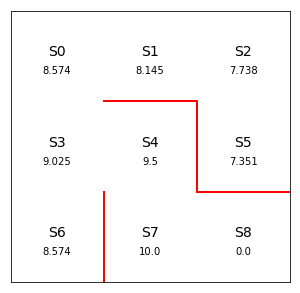

In [55]:
def plot_V_pi(V_pi):
    # 初期位置での迷路の様子
    # 図を描く大きさと、図の変数名を宣言
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()

    # 赤い壁を描く
    plt.plot([1, 1], [0, 1], color='red', linewidth=2)
    plt.plot([1, 2], [2, 2], color='red', linewidth=2)
    plt.plot([2, 2], [2, 1], color='red', linewidth=2)
    plt.plot([2, 3], [1, 1], color='red', linewidth=2)

    # 状態を示す文字S0～S8を描く
    xy = []
    i = 0
    for y in [2.5, 1.5, 0.5]:
        for x in [0.5, 1.5, 2.5]:
            plt.text(x,y , "S"+str(i) , size=14, ha='center')
            plt.text(x, y-0.2, str(round(V_pi[i], 3)), ha='center')
            i += 1
        
    # 描画範囲の設定と目盛りを消す設定
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 学習がうまくいっている.
pi, V = Policy_iteration()
print(pi)
plot_V_pi(V)

## 7. 価値反復法
方策反復法の方策評価ステップでは, $V^{\pi}$ が収束するまでループを回した.

そんなに厳密に $V^{\pi}$ を求めなくてもいいんじゃね ? &rarr; 方策評価と方策改善を交互に1回ずつ行う.

方策評価 : 反復法, 方策改善 : greedy とアルゴリズムを選択した時, 

$$ \begin{eqnarray}
    \pi'(s, a) &\leftarrow& \begin{cases} 1 \quad ( a = \underset{a'\in A}{\operatorname{argmax}} Q^{\pi}(s, a') ) \\ 0 \quad ( otherwise ) \end{cases} \\
    V^{\pi}_{k+1}(s) &\leftarrow& \sum_{a \in A} \pi'(s, a) Q^{\pi}(s, a) = \sum_{a \in A} \pi'(s, a) \sum_{s' \in S} P(s, a, s') ( r( s, a, s' ) + \gamma V^{\pi}_{k} (s'))
\end{eqnarray} $$

これら2つの式を1つにまとめることができて, 
$$ V^{\pi}_{k+1}(s) \leftarrow \max_{a \in A} Q^{\pi}(s, a) = \max_{a \in A} \sum_{s' \in S} P(s, a, s') ( r( s, a, s' ) + \gamma V^{\pi}_{k} (s')) $$

ちなみに, この式は最適ベルマン方程式と同じ形になっている.

<img src="https://yoheitaonishi.com/wp-content/uploads/2018/10/%E5%9B%B34.5.png" width=500>


In [56]:
def Value_iteration():
    # Initialization
    V = np.random.rand(len(S))
    stop_epsilon = 10**-4
    while True:
        V_new = np.array( [ np.max([ reward(s, a, next_s(s, a) ) + gamma*V[next_s(s, a)] for a in A if valid_action(s, a)]) if s != 8 else 0.0 for s in S])
        if np.sum(np.abs(V_new - V)) < stop_epsilon:
            break
        else:
            V = V_new
    Q = np.array( [ [ sum([ reward(s, action_idx(a), next_s(s, a)) + gamma*V[next_s(s, a)] ]) if valid_action(s, a) else -float('inf') for a in A  ] for s in S[:-1] ])
    pi_ = np.argmax(Q, axis=1)
    pi = np.zeros((len(S)-1, len(A)))
    for s in S[:-1]:
        pi[s, pi_[s]] = 1.0
    return pi, V

[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]]


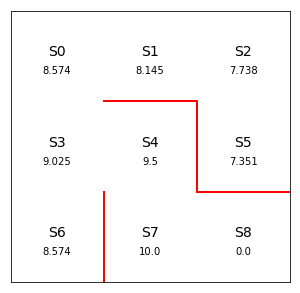

In [57]:
pi, V = Value_iteration()
print(pi)
plot_V_pi(V)

## 8. 一般化方策反復

> 方策評価と方策改善の2つの過程の相互作用を一般的概念として、一般化方策反復（generalized policy iteration; GPI）と呼ぶ.

方策評価と方策改善を交互に行うことで, だんだん最適な方策 $\pi^*$ と $\pi^*$ における真の状態価値関数 $V^{\pi^*}$ が求まるイメージ図.

<img src="https://yoheitaonishi.com/wp-content/uploads/2018/10/%E8%A9%95%E4%BE%A1%E9%81%8E%E7%A8%8B%E3%81%A8%E6%94%B9%E5%96%84%E9%81%8E%E7%A8%8B.png" width=500 >

